In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
titanicTrainData = pd.read_csv('/home/saileshg/sailspace/dev/pyprojects/handson-ml-master/datasets/titanic/train.csv')
titanicTestData = pd.read_csv('/home/saileshg/sailspace/dev/pyprojects/handson-ml-master/datasets/titanic/test.csv')

nCols = titanicTrainData.shape[1]
print("nCols: ", nCols)

('nCols: ', 12)


In [3]:
# Check the attributes and initial few datapoints
print(titanicTrainData.info())
print(titanicTrainData.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence

In [4]:
titanicTrainData = titanicTrainData.set_index('PassengerId')
titanicTestData = titanicTestData.set_index('PassengerId')

overallSurvivalRate = titanicTrainData['Survived'].sum()/float(titanicTrainData['Survived'].count())
print("overall-survival-rate: ", overallSurvivalRate)
# count gives the missing values
print(titanicTrainData.describe())


('overall-survival-rate: ', 0.38383838383838381)
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


('Missing data in training set: ', Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64)
('Missing data in test set: ', Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64)


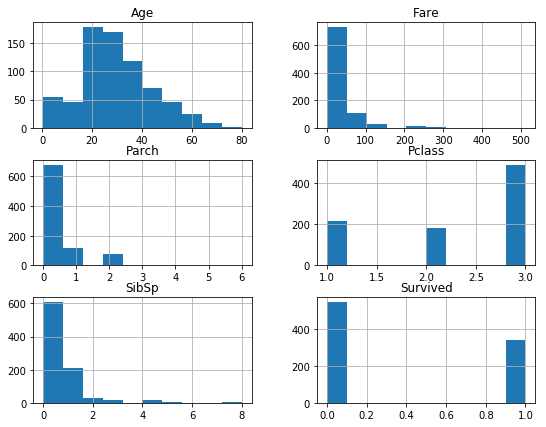

In [5]:
print("Missing data in training set: ", titanicTrainData.isnull().sum())
print("Missing data in test set: ", titanicTestData.isnull().sum())

nullCols = titanicTrainData.columns[titanicTrainData.isnull().any()]
nullColsTest = titanicTestData.columns[titanicTestData.isnull().any()]

titanicTrainData.hist(bins=10, figsize=(9,7))
plt.show()

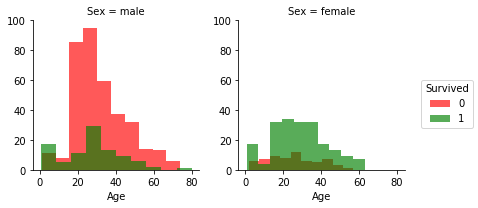

In [6]:
grid = sns.FacetGrid(titanicTrainData, col = "Sex", hue="Survived", margin_titles=True, palette={0:'red',1:'green'})
grid.map(plt.hist, "Age", alpha=0.65).add_legend()
#grid.fig.suptitle("Gender-wise Histogram for Survivors w.r.t Age")
plt.show()

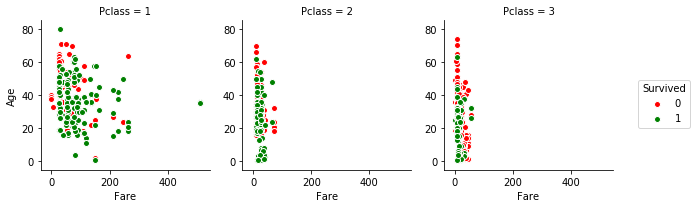

In [7]:
grid = sns.FacetGrid(titanicTrainData, col = "Pclass", hue="Survived", margin_titles=True, palette={1:"green",0:"red"})
grid.map(plt.scatter, "Fare", "Age", edgecolor="w").add_legend()
# grid.fig.suptitle("Class-wise Scatterplot for Survivors w.r.t Fare & Age")
plt.show()

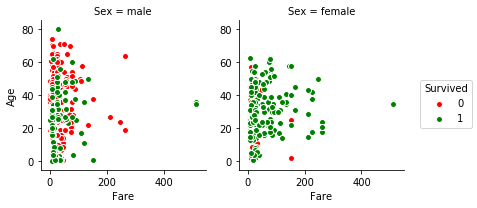

In [8]:
grid = sns.FacetGrid(titanicTrainData, col = "Sex", hue = "Survived", margin_titles=True, palette={0:"red", 1:"green"})
grid.map(plt.scatter, "Fare", "Age", edgecolor="w").add_legend()
# grid.fig.suptitle("Gender-wise Scatterplot for Survivors w.r.t Fare & Age")
plt.show()

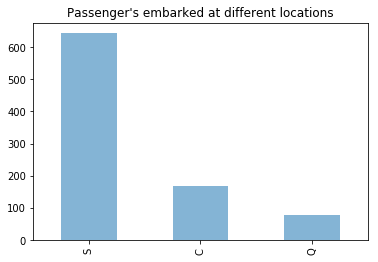

In [9]:
titanicTrainData.Embarked.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Passenger's embarked at different locations")
plt.show()

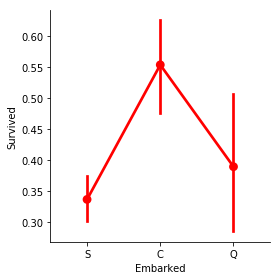

In [10]:
sns.factorplot(x='Embarked', y='Survived', data=titanicTrainData, color='r')
plt.show()

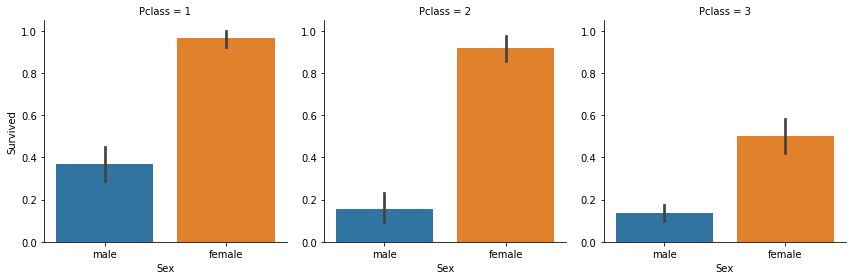

In [11]:
facet = sns.factorplot(x="Sex", y="Survived", col = "Pclass", data=titanicTrainData, kind="bar")
# facet.fig.suptitle("Class-wise survival by Gender")
plt.show()

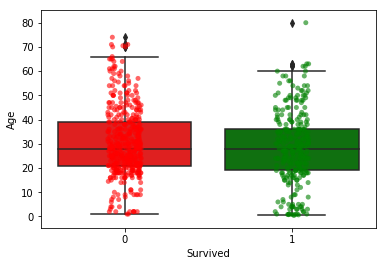

In [12]:
sns.boxplot(x="Survived", y="Age", data=titanicTrainData, palette={0:'red',1:'green'})
sns.stripplot(x="Survived", y="Age", data=titanicTrainData, jitter=True, edgecolor="gray", alpha=.6, palette={0:'red',1:'green'})
plt.show()

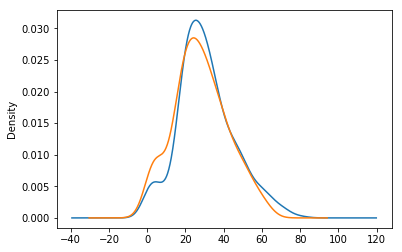

In [13]:
titanicTrainData.Age[titanicTrainData.Sex == 'male'].plot(kind='kde')
titanicTrainData.Age[titanicTrainData.Sex == 'female'].plot(kind='kde')
plt.show()

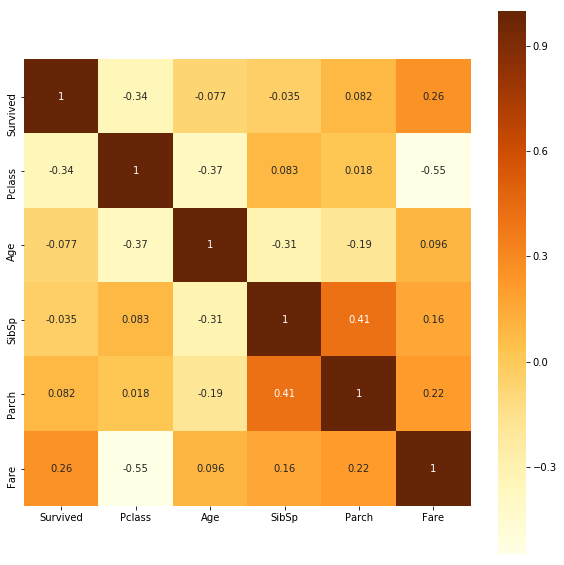

In [14]:
corr=titanicTrainData.corr()
plt.figure(figsize=(10,10))

sns.heatmap(corr, square=True, annot=True, cmap='YlOrBr', linecolor='white')
plt.show()

In [15]:
print(nullCols)

print(titanicTrainData.Embarked.isnull().sum())
print(titanicTrainData.Cabin.isnull().sum())
print(titanicTrainData.Age.isnull().sum())

print(titanicTrainData[titanicTrainData.Embarked.isnull()])
# Above datapoints say both passengers were in Pclass=1 and Fare=80
# Plotting distribution of Fares w.r.t Pclass=1 across Embark locations
sns.boxplot(data=titanicTrainData, x='Embarked', y='Fare', hue='Pclass')

# Median 80 appears in location 'C', hence imputing Embarked values as 'C'
titanicTrainData['Embarked'] = titanicTrainData['Embarked'].fillna('C')

Index([u'Age', u'Cabin', u'Embarked'], dtype='object')
2
687
177
             Survived  Pclass                                       Name  \
PassengerId                                                                
62                  1       1                        Icard, Miss. Amelie   
830                 1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

                Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
PassengerId                                                           
62           female  38.0      0      0  113572  80.0   B28      NaN  
830          female  62.0      0      0  113572  80.0   B28      NaN  


In [16]:
# Impute/handle all missing values in Training/Testing data and then write the processed data out
# Training set - Age, Cabin, Embarked(done above) | Test set - Age, Fare, Cabin
print("Age missing data: ", titanicTrainData[titanicTrainData.Age.isnull()].describe())
print("Pclass breakup in Age missing data: ", titanicTrainData.Pclass[titanicTrainData.Age.isnull()].value_counts())

('Age missing data: ',          Survived      Pclass  Age       SibSp       Parch        Fare
count  177.000000  177.000000  0.0  177.000000  177.000000  177.000000
mean     0.293785    2.598870  NaN    0.564972    0.180791   22.158567
std      0.456787    0.763216  NaN    1.626316    0.534145   31.874608
min      0.000000    1.000000  NaN    0.000000    0.000000    0.000000
25%      0.000000    3.000000  NaN    0.000000    0.000000    7.750000
50%      0.000000    3.000000  NaN    0.000000    0.000000    8.050000
75%      1.000000    3.000000  NaN    0.000000    0.000000   24.150000
max      1.000000    3.000000  NaN    8.000000    2.000000  227.525000)
('Pclass breakup in Age missing data: ', 3    136
1     30
2     11
Name: Pclass, dtype: int64)


In [17]:
# Wrong filtering, need to check

print("Mean Age for rest of data where Pclass is 3 and mean Fare is 22-24: ", np.mean(titanicTrainData.Age[~titanicTrainData.Age.isnull()][titanicTrainData.Pclass == 3][titanicTrainData.Fare > 22][titanicTrainData.Fare < 25]))
# Setting Age as 24 for age missing data
titanicTrainData['Age'] = titanicTrainData['Age'].fillna(24)

('Mean Age for rest of data where Pclass is 3 and mean Fare is 22-24: ', 24.428571428571427)


In [18]:
# Wrong filtering, need to check

print("Cabin missing data: ", titanicTrainData[titanicTrainData.Cabin.isnull()].describe())
print("Cabin distribution for rest of the data where Pclass is 3 and mean Fare is 19-23: ", titanicTrainData.Cabin[~titanicTrainData.Cabin.isnull()][titanicTrainData.Pclass == 3][titanicTrainData.Fare < 23][titanicTrainData.Fare > 19])
titanicTrainData['Cabin'] = titanicTrainData['Cabin'].fillna('F E69')

('Cabin missing data: ',          Survived      Pclass         Age       SibSp       Parch        Fare
count  687.000000  687.000000  687.000000  687.000000  687.000000  687.000000
mean     0.299854    2.639010   26.737627    0.547307    0.365357   19.157325
std      0.458528    0.589602   11.914178    1.207492    0.827106   28.663343
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   21.500000    0.000000    0.000000    7.877100
50%      0.000000    3.000000   24.000000    0.000000    0.000000   10.500000
75%      1.000000    3.000000   32.000000    1.000000    0.000000   23.000000
max      1.000000    3.000000   74.000000    8.000000    6.000000  512.329200)
('Cabin distribution for rest of the data where Pclass is 3 and mean Fare is 19-23: ', PassengerId
129    F E69
Name: Cabin, dtype: object)


In [19]:
print("Age missing test data: ", titanicTestData[titanicTestData.Age.isnull()].describe())
print("Pclass breakup in Age missing test data: ", titanicTestData.Pclass[titanicTestData.Age.isnull()].value_counts())

('Age missing test data: ',           Pclass  Age      SibSp      Parch       Fare
count  86.000000  0.0  86.000000  86.000000  86.000000
mean    2.732558  NaN   0.313953   0.372093  15.017055
std     0.640302  NaN   0.973310   1.471666  14.184527
min     1.000000  NaN   0.000000   0.000000   0.000000
25%     3.000000  NaN   0.000000   0.000000   7.750000
50%     3.000000  NaN   0.000000   0.000000   7.972900
75%     3.000000  NaN   0.000000   0.000000  15.559400
max     3.000000  NaN   8.000000   9.000000  69.550000)
('Pclass breakup in Age missing test data: ', 3    72
1     9
2     5
Name: Pclass, dtype: int64)


In [20]:
print("Mean age for rest of the test data with Pclass as 3, and Fare around 15: ",np.mean(titanicTestData.Age[~titanicTestData.Age.isnull()][titanicTestData.Pclass == 3][titanicTestData.Fare > 14][titanicTestData.Fare < 16]))
titanicTestData['Age'] = titanicTestData['Age'].fillna(23)

('Mean age for rest of the test data with Pclass as 3, and Fare around 15: ', 22.694166666666664)


In [21]:
print("Cabin missing testdata: ", titanicTestData[titanicTestData.Cabin.isnull()].describe())

print("Cabin distribution for rest of the test data where Pclass is 3: ", titanicTestData.Cabin[~titanicTestData.Cabin.isnull()][titanicTestData.Pclass == 3])
titanicTestData['Cabin'] = titanicTestData['Cabin'].fillna('F E57')

('Cabin missing testdata: ',            Pclass         Age       SibSp       Parch        Fare
count  327.000000  327.000000  327.000000  327.000000  326.000000
mean     2.571865   26.061162    0.412844    0.373089   19.080828
std      0.641273   10.821759    0.954913    1.015951   24.876658
min      1.000000    0.170000    0.000000    0.000000    0.000000
25%      2.000000   22.000000    0.000000    0.000000    7.822900
50%      3.000000   23.000000    0.000000    0.000000   11.500000
75%      3.000000   30.000000    1.000000    0.000000   22.274975
max      3.000000   63.000000    8.000000    9.000000  262.375000)
('Cabin distribution for rest of the test data where Pclass is 3: ', PassengerId
949     F G63
1009       G6
1180    F E46
1213    F E57
Name: Cabin, dtype: object)


In [22]:
print("Fare missing test data: ", titanicTestData[titanicTestData.Fare.isnull()].describe())
print("mean Fare distribution for rest of the data where Pclass is 3: ", np.mean(titanicTestData.Fare[~titanicTestData.Fare.isnull()][titanicTestData.Pclass == 3]))
titanicTestData['Fare'] = titanicTestData['Fare'].fillna(12.5)

('Fare missing test data: ',        Pclass   Age  SibSp  Parch  Fare
count     1.0   1.0    1.0    1.0   0.0
mean      3.0  60.5    0.0    0.0   NaN
std       NaN   NaN    NaN    NaN   NaN
min       3.0  60.5    0.0    0.0   NaN
25%       3.0  60.5    0.0    0.0   NaN
50%       3.0  60.5    0.0    0.0   NaN
75%       3.0  60.5    0.0    0.0   NaN
max       3.0  60.5    0.0    0.0   NaN)
('mean Fare distribution for rest of the data where Pclass is 3: ', 12.459677880184334)


In [23]:
labelEncoder = LabelEncoder()
categoricalCols = ['Name', 'Sex','Ticket', 'Cabin', 'Embarked']
for c in categoricalCols:
    titanicTrainData[c] = labelEncoder.fit_transform(titanicTrainData[c])
    titanicTestData[c] = labelEncoder.fit_transform(titanicTestData[c])

titanicTrainData.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,108,1,22.0,1,0,523,7.2500,138,2
2,1,1,190,0,38.0,1,0,596,71.2833,81,0
3,1,3,353,0,26.0,0,0,669,7.9250,138,2
4,1,1,272,0,35.0,1,0,49,53.1000,55,2
5,0,3,15,1,35.0,0,0,472,8.0500,138,2


In [25]:
# Since Age, Fare are numeric attributes on different scales, they've to be standardized
standardScaler = StandardScaler().fit(titanicTrainData[['Age','Fare']])
titanicTrainData[['Age','Fare']] = standardScaler.transform(titanicTrainData[['Age','Fare']])
standardScaler = StandardScaler().fit(titanicTestData[['Age','Fare']])
titanicTestData[['Age','Fare']] = standardScaler.transform(titanicTestData[['Age','Fare']])

In [26]:
titanicTrainData.corr()['Survived']

Survived    1.000000
Pclass     -0.338481
Name       -0.057343
Sex        -0.543351
Age        -0.052872
SibSp      -0.035322
Parch       0.081629
Ticket     -0.164549
Fare        0.257307
Cabin      -0.242224
Embarked   -0.174199
Name: Survived, dtype: float64

In [27]:
titanicTrainProcessed = titanicTrainData
titanicTestProcessed = titanicTestData
# titanicTrainProcessed.info()
titanicTrainProcessed.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,108,1,-0.497793,1,0,523,-0.502445,138,2
2,1,1,190,0,0.715048,1,0,596,0.786845,81,0
3,1,3,353,0,-0.194583,0,0,669,-0.488854,138,2
4,1,1,272,0,0.487640,1,0,49,0.420730,55,2
5,0,3,15,1,0.487640,0,0,472,-0.486337,138,2


In [29]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

predictors = ["Pclass", "Sex", "Fare", "Embarked","Age","Parch"]
logisticModel = LogisticRegression(random_state=42)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
scores = cross_val_score(logisticModel, X=titanicTrainProcessed[predictors], y=titanicTrainProcessed['Survived'], scoring='f1', cv=cv)
print("Mean cv score for Logistic Regression: ", np.mean(scores))

('Mean cv score for Logistic Regression: ', 0.73283976663389239)
